In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\USER\\Documents\\projects\\plant-diseases\\notebooks'

In [3]:
base_dir = 'C:\\Users\\USER\\Documents\\projects\\plant-diseases'
os.listdir(base_dir)

['data', 'models', 'notebooks']

In [4]:
data_folder = os.path.join(base_dir, 'data')
os.listdir(data_folder)

['maize']

In [5]:
maize_data_folder = os.path.join(data_folder, 'maize')
os.listdir(maize_data_folder)

['common_rust', 'healthy', 'leaf_spot', 'nothern_leaf_blight']

In [6]:
common_rust_images = []
common_rust_images_path = os.path.join(maize_data_folder, 'common_rust')
for image_path in os.listdir(common_rust_images_path):
    image_path = os.path.join(common_rust_images_path, image_path)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    common_rust_images.append(image)

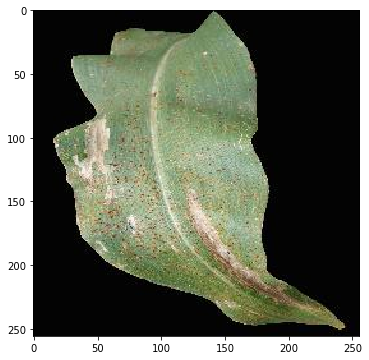

In [7]:
common_rust_sample = common_rust_images[0]
plt.figure(figsize=(12,6))
plt.imshow(common_rust_sample)

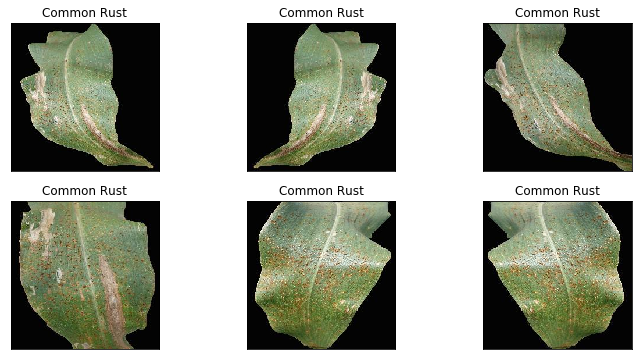

In [8]:
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(common_rust_images[i])
    plt.title('Common Rust')
    plt.xticks([])
    plt.yticks([])
plt.show()

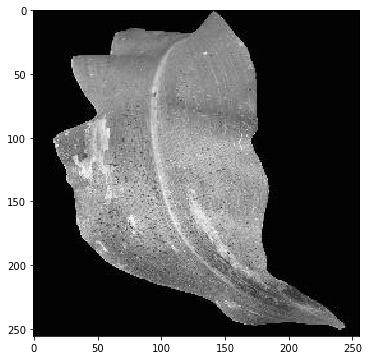

In [9]:
common_rust_sample_gray = cv2.cvtColor(common_rust_sample,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(12,6))
plt.imshow(common_rust_sample_gray, cmap='gray')

In [10]:
healthy_images = []
healthy_images_path = os.path.join(maize_data_folder, 'healthy')
for image_path in os.listdir(healthy_images_path):
    image_path = os.path.join(healthy_images_path, image_path)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    healthy_images.append(image)

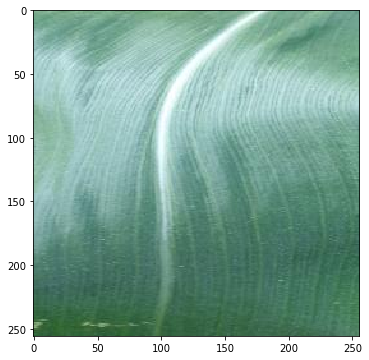

In [11]:
healthy_sample = healthy_images[0]
plt.figure(figsize=(12,6))
plt.imshow(healthy_sample)

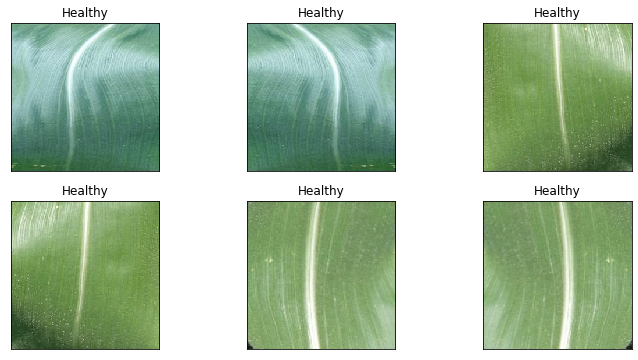

In [12]:
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(healthy_images[i])
    plt.title('Healthy')
    plt.xticks([])
    plt.yticks([])
plt.show()

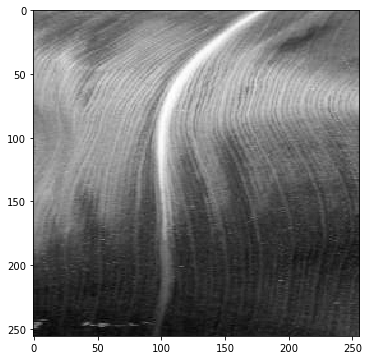

In [13]:
healthy_sample_gray = cv2.cvtColor(healthy_sample,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(12,6))
plt.imshow(healthy_sample_gray, cmap='gray')

In [14]:
comparison = [healthy_sample_gray, common_rust_sample_gray]
names = ['Healthy', 'Common Rust']

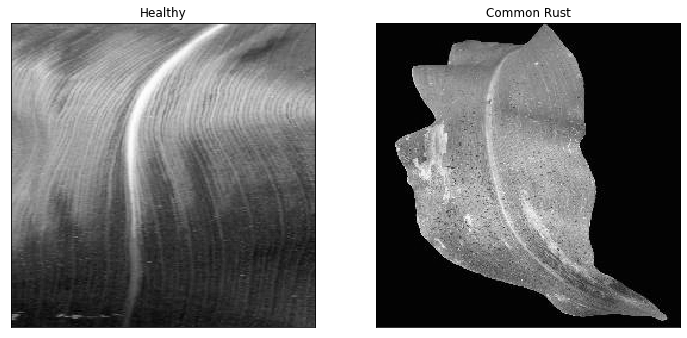

In [15]:
plt.figure(figsize=(12,6))
for i in range(len(comparison)):
    plt.subplot(1,len(comparison), i+1)
    plt.imshow(comparison[i], cmap='gray')
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
'''
1. Look at the edges
2. Look at the leaf distortion
3. Look at the leaf colourasition.
4. Presence or absence of spots
5. Look at the leaf texture
6. Number of descriptors greater than a given value
'''

In [16]:
leaf_spot_images = []
leaf_spot_images_path = os.path.join(maize_data_folder, 'leaf_spot')
for image_path in os.listdir(leaf_spot_images_path):
    image_path = os.path.join(leaf_spot_images_path, image_path)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    leaf_spot_images.append(image)

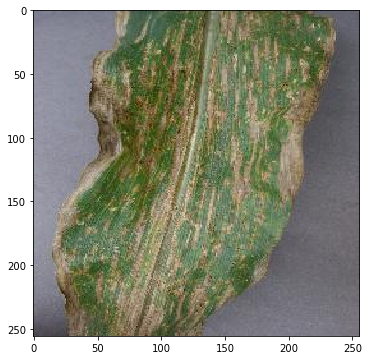

In [17]:
leaf_spot_sample = leaf_spot_images[0]
plt.figure(figsize=(12,6))
plt.imshow(leaf_spot_sample)

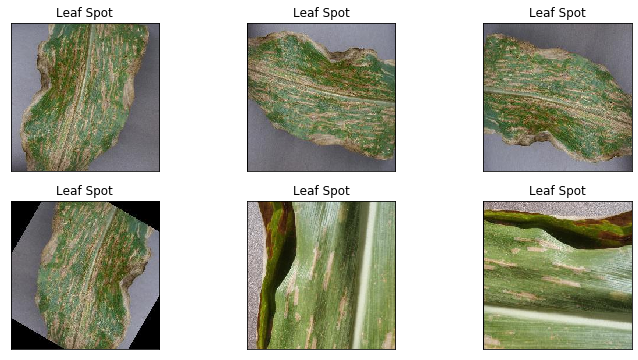

In [18]:
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(leaf_spot_images[i])
    plt.title('Leaf Spot')
    plt.xticks([])
    plt.yticks([])
plt.show()

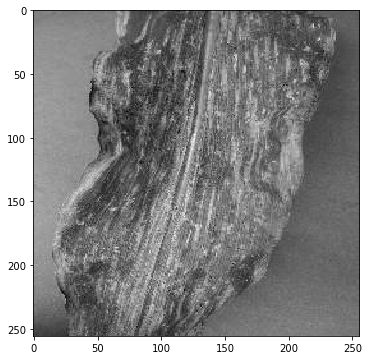

In [19]:
leaf_spot_sample_gray = cv2.cvtColor(leaf_spot_sample,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(12,6))
plt.imshow(leaf_spot_sample_gray, cmap='gray')

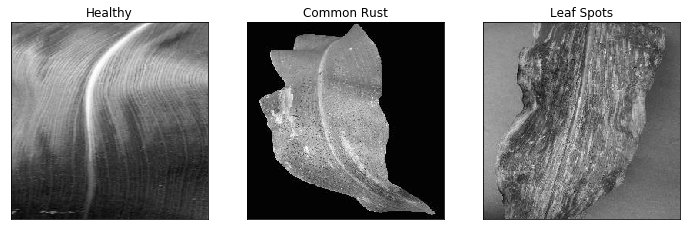

In [20]:
comparison_gray = [healthy_sample_gray, common_rust_sample_gray, leaf_spot_sample_gray]
names = ['Healthy', 'Common Rust', 'Leaf Spots'] 
plt.figure(figsize=(12,6))
for i in range(len(comparison_gray)):
    plt.subplot(1,len(comparison_gray), i+1)
    plt.imshow(comparison_gray[i], cmap='gray')
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

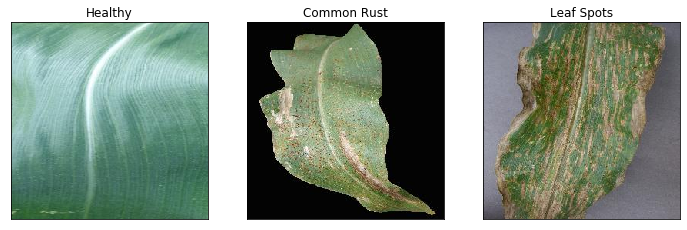

In [21]:
comparison_color = [healthy_sample, common_rust_sample, leaf_spot_sample]
names = ['Healthy', 'Common Rust', 'Leaf Spots'] 
plt.figure(figsize=(12,6))
for i in range(len(comparison_color)):
    plt.subplot(1,len(comparison_color), i+1)
    plt.imshow(comparison_color[i])
    plt.title(names[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [22]:
nothern_leaf_blight_images = []
nothern_leaf_blight_images_path = os.path.join(maize_data_folder, 'nothern_leaf_blight')
for image_path in os.listdir(nothern_leaf_blight_images_path):
    image_path = os.path.join(nothern_leaf_blight_images_path, image_path)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    nothern_leaf_blight_images.append(image)

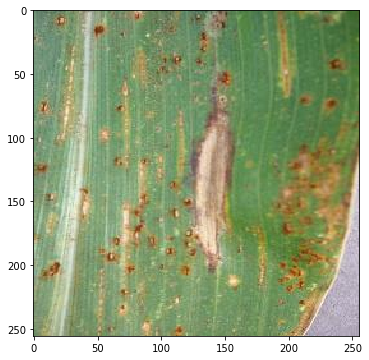

In [23]:
nothern_leaf_blight_sample = nothern_leaf_blight_images[0]
plt.figure(figsize=(12,6))
plt.imshow(nothern_leaf_blight_sample)

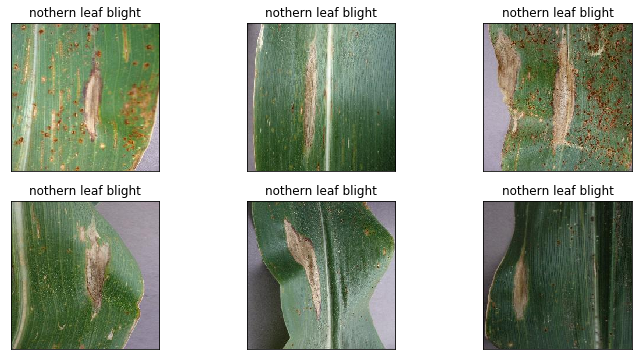

In [24]:
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(nothern_leaf_blight_images[i])
    plt.title('nothern leaf blight')
    plt.xticks([])
    plt.yticks([])
plt.show()

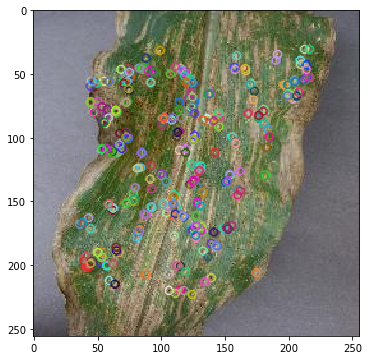

In [25]:
orb = cv2.ORB_create()
kps, ds = orb.detectAndCompute(leaf_spot_sample, None)
with_keypoints = cv2.drawKeypoints(leaf_spot_sample, kps, None)
plt.figure(figsize=(12,6))
plt.imshow(with_keypoints)

(54, 32)

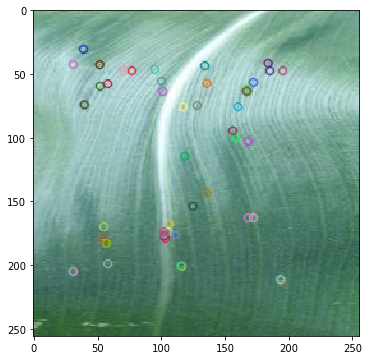

In [26]:
orb = cv2.ORB_create()
kps, ds = orb.detectAndCompute(healthy_sample, None)
with_keypoints = cv2.drawKeypoints(healthy_sample, kps, None)
plt.figure(figsize=(12,6))
plt.imshow(with_keypoints)
ds.shape

(378, 32)

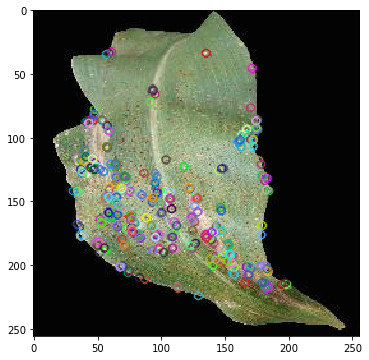

In [27]:
orb = cv2.ORB_create()
kps, ds = orb.detectAndCompute(common_rust_sample, None)
with_keypoints = cv2.drawKeypoints(common_rust_sample, kps, None)
plt.figure(figsize=(12,6))
plt.imshow(with_keypoints)
ds.shape

(393, 32)

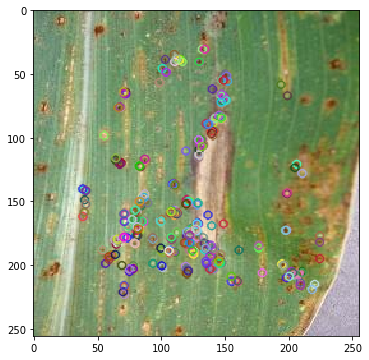

In [28]:
orb = cv2.ORB_create()
kps, ds = orb.detectAndCompute(nothern_leaf_blight_sample, None)
with_keypoints = cv2.drawKeypoints(nothern_leaf_blight_sample, kps, None)
plt.figure(figsize=(12,6))
plt.imshow(with_keypoints)
ds.shape

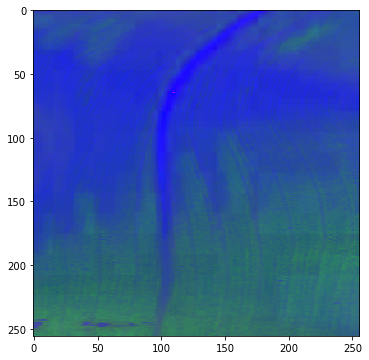

In [29]:
healthy_sample_hsv = cv2.cvtColor(healthy_sample,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,6))
plt.imshow(healthy_sample_hsv)

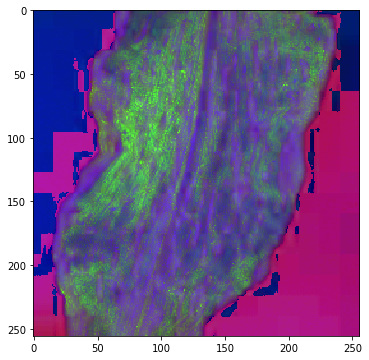

In [30]:
leaf_spot_sample_hsv = cv2.cvtColor(leaf_spot_sample,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,6))
plt.imshow(leaf_spot_sample_hsv)

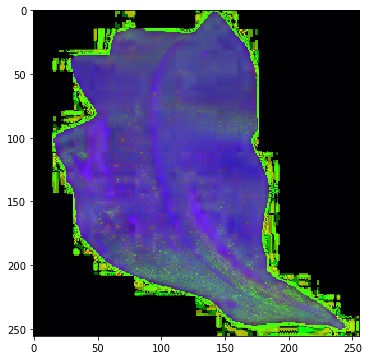

In [31]:
common_rust_sample_hsv = cv2.cvtColor(common_rust_sample,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,6))
plt.imshow(common_rust_sample_hsv)

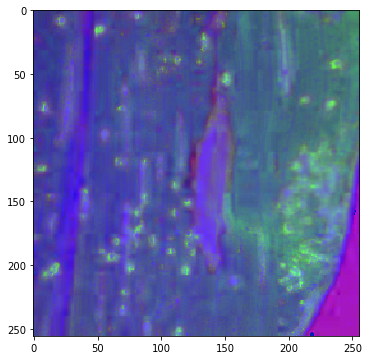

In [32]:
nothern_leaf_blight_sample_hsv = cv2.cvtColor(nothern_leaf_blight_sample,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(12,6))
plt.imshow(nothern_leaf_blight_sample_hsv)